In [21]:
# Imports
import pandas as pd
import sns as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import statistics as stat

In [22]:
# Load the heart disease dataset:
dataframe = pd.read_csv("../data/heart.csv")
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Question 1: Data Exploration Questions**
* Question 1.1: How many positive examples of heart disease are in this dataset?
* Question 1.2: How many negative examples (no heart disease) are in this dataset?
* Question 1.3: What is the average age for subjects in this dataset?
* Question 1.4: Which variable is most positively correlated with heart disease?
* Question 1.5: Which variable is most negatively correlated with heart disease?
* Question 1.6: How much does Age correlate with Max Heart Rate (MaxHR)?

**Question 1: Answers**
* Question 1.1: 508 positive examples of heart disease.
* Question 1.2: 410 negative examples of heart disease.
* Question 1.3: 53.51 years is the average age for the subjects.
* Question 1.4: Oldpeak is most positively correlated with heart disease.
* Question 1.5: MaxHR is most negatively correlated with heart disease.
* Question 1.6: Age correlates with MaxHR for -0.382045.

**The work used to find the answers are shown in the code below**

In [23]:
# Question 1.1: How many positive examples of heart disease are in this dataset?
# Question 1.2: How many negative examples (no heart disease) are in this dataset?
q1_1, q1_2 = 0, 0
for i in dataframe["HeartDisease"]:
    if i == 1:
        q1_1 += 1
    elif i == 0:
        q1_2 += 1
print("Question 1.1: The number of positive examples of heart disease", q1_1)
print("Question 1.2: The number of negative examples of heart disease", q1_2)

# Question 1.3: What is the average age for subjects in this dataset?
print("Question 1.3: The average age for subjects in the dataset", stat.mean(dataframe["Age"]))

Question 1.1: The number of positive examples of heart disease 508
Question 1.2: The number of negative examples of heart disease 410


TypeError: 'float' object is not callable

In [ ]:
dataframe.corr()

In [ ]:
# Question 1.4: Which variable is most positively correlated with heart disease?
print("Question 1.4: Oldpeak is most positively correlated with heart disease.")
# This answer is derived from the table above when running dataframe.corr().
# We know Oldpeak is the variable most positively correlated with heart disease
# because Oldpeak has 0.403951 in the HeartDisease column while the other
# variables are either negative or a lower positive number.

# Question 1.5: Which variable is most negatively correlated with heart disease?
print("Question 1.5: MaxHR is most negatively correlated with heart disease.")
# This answer is derived from the table above when running dataframe.corr().
# We know MaxHR is most negatively correlated with heart disease
# because MaxHR has -0.400421 in the HeartDisease column while the other
# variables are either positive or not as negative.

# Question 1.6: How much does Age correlate with Max Heart Rate (MaxHR)?
print("Question 1.6: Age correlates with MaxHR for -0.382045")
# This answer is derived from the dataframe.corr() table above

In [ ]:
# Choose one X variables to predict from. We can add more variables into X here.
X = dataframe[['Age']]

# y variable is the target label we want to predict.
y = dataframe['HeartDisease']

# Split data into two sections. 70% will be for training, 30% will be for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
def predict_heart_disease_from_age(age: int) -> int:
    return int(age > 100)
predicted_y = [predict_heart_disease_from_age(a) for a in X['Age']]
accuracy = accuracy_score(predicted_y, y)
print(f"The predict_heart_disease_from_age accurately classifies {accuracy*100:.2f}% of examples")

The predict_heart_disease_from_age accurately classifies 44.66% of examples


**Question 2: Manual Classifier**
How would we manually create a function to solve this task for us? Try it.
* Question 2.1: The function predict_heart_disease_from_age only predicts individuals above 100 years old will have heart disease. This won't match any examples in the dataset, but still achieves 44.66% accuracy. Why is that?
* Question 2.2: Try to make the best predict_heart_disease_from_age function you can. What is the best value to split at? How do you pick this? Please include the train and test accuracy.*

**Question 2: Answers**
* Question 2.1: There are no individuals above 100 years old with heart disease, therefore accuracy_score compares it with all the cases of no heart disease which is 44.66%
* Question 2.2: The best value to split at is 54 or around 54. I picked 54 because the mode and the median are both 54 plus the mean is 53.5, therefore I believe 54 is the best integer to split the age at. The training accuracy of splitting the age at 54 is 66.04% and the test accuracy of training is 58.33%.*

**The work used to find the answers are shown in the code below**

In [111]:
# Question 2.2: Try to make the best predict_heart_disease_from_age function you can. What is the best value to split at? How do you pick this? Please include the train and test accuracy.
print("Mean:", stat.mean(dataframe['Age']), "\nMode:", stat.mode(dataframe['Age']), " \nMedian:", stat.median(dataframe['Age']))
# Since the median, mode are 54 and mean is also 53.5, we can use 54 as the best value to split.
def predict_heart_disease_from_age(age: int) -> int:
    return int(age > stat.mode(dataframe['Age']))

# Finding Training Accuracy
predicted_y = [predict_heart_disease_from_age(a) for a in X_train['Age']]
accuracy = accuracy_score(predicted_y, y_train)
print(f"The predict_heart_disease_from_age accurately classifies {accuracy*100:.2f}% of examples")

# Finding Test Accuracy
predicted_y = [predict_heart_disease_from_age(a) for a in X_test['Age']]
accuracy = accuracy_score(predicted_y, y_test)
print(f"The predict_heart_disease_from_age accurately classifies {accuracy*100:.2f}% of examples")

Mean: 53.510893246187365 
Mode: 54  
Median: 54.0
The predict_heart_disease_from_age accurately classifies 66.04% of examples
The predict_heart_disease_from_age accurately classifies 58.33% of examples


In [ ]:
# Train a decision tree with max_depth 1.
classifier = tree.DecisionTreeClassifier(max_depth=1)
classifier = classifier.fit(X_train, y_train)

# Predict and measure the accuracy on the training set.
predicted_y_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, predicted_y_train)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of train examples")

# Predict and measure the accuracy on the testing set.
predicted_y_test = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y_test)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of test examples")

[Text(0.5, 0.75, 'Age <= 54.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.471\nsamples = 332\nvalue = [206, 126]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.417\nsamples = 310\nvalue = [92, 218]\nclass = 1')]

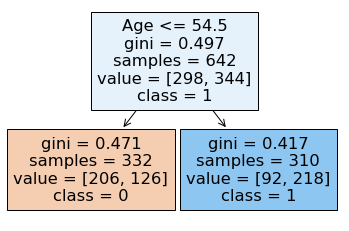

In [113]:
# Visualize the tree
viz = tree.plot_tree(classifier, feature_names=X.columns, class_names=list(['0', '1']) , filled=True)
# Alternatively, visualize the tree using dtreeviz package
#from dtreeviz.trees import dtreeviz
#viz = treeviz(clf, X, y, target_name="y", feature_names=X.columns, class_names=list(['0', '1']))
viz

**Question 3: Training Decision Trees**
* Question 3.1: Experiment with the X features included (currently only Age is included). Add MaxHR, RestingBP, or any other numerical features. (Note you cannot yet include categorical features such as ChestPainType). Include the train and test accuracy on various different sets of variables. Include a printout of the tree.
* Question 3.2: Discuss how various features affect the performance of the model.
* Question 3.3: Experiment with the max_depth hyperparementer parameter to DecisionTreeClassifier. How does that affect the results? Report train-accuracy and test-accuracy for various values of max_depth.
* Question 3.4: Why might the train-accuracy and test-accuracy differ?

**Question 3: Answers**
* Question 3.1:
* Question 3.2:
* Question 3.3:
* Question 3.4:

In [123]:
# Choose one X variables to predict from. We can add more variables into X here.
X = dataframe[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]]

# y variable is the target label we want to predict.
y = dataframe["HeartDisease"]

# Split data into two sections. 70% will be for training, 30% will be for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [143]:
from sklearn.datasets import load_iris
import numpy as np
# Question 3.1: Experiment with the X features included (currently only Age is included). Add MaxHR, RestingBP, or any other numerical features. (Note you cannot yet include categorical features such as ChestPainType). Include the train and test accuracy on various different sets of variables. Include a printout of the tree.
# Choose one X variables to predict from. We can add more variables into X here.
X = dataframe[["Age", "RestingBP", "Cholesterol"]]

# y variable is the target label we want to predict.
y = dataframe["HeartDisease"]

# Split data into two sections. 70% will be for training, 30% will be for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Question 3.1: Experiment with the X features included (currently only Age is included). Add MaxHR, RestingBP, or any other numerical features. (Note you cannot yet include categorical features such as ChestPainType). Include the train and test accuracy on various different sets of variables. Include a printout of the tree.
classifier = tree.DecisionTreeClassifier(max_depth=1)# Visualize the tree
classifier = classifier.fit(X_train, y_train)

# Predict and measure the accuracy on the training set.
predicted_y_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, predicted_y_train)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of train examples")

# Predict and measure the accuracy on the testing set.
predicted_y_test = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y_test)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of test examples")

The classifier accurately classifies 66.04% of train examples
The classifier accurately classifies 58.33% of test examples


The classifier accurately classifies 79.75% of train examples
The classifier accurately classifies 81.16% of test examples


[Text(0.5, 0.875, 'Oldpeak <= 0.75\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = 1'),
 Text(0.25, 0.625, 'Cholesterol <= 42.5\ngini = 0.436\nsamples = 336\nvalue = [228, 108]\nclass = 0'),
 Text(0.125, 0.375, 'FastingBS <= 0.5\ngini = 0.26\nsamples = 52\nvalue = [8, 44]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.408\nsamples = 28\nvalue = [8, 20]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = 1'),
 Text(0.375, 0.375, 'Age <= 56.5\ngini = 0.349\nsamples = 284\nvalue = [220, 64]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.239\nsamples = 209\nvalue = [180, 29]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.498\nsamples = 75\nvalue = [40, 35]\nclass = 0'),
 Text(0.75, 0.625, 'MaxHR <= 150.5\ngini = 0.353\nsamples = 306\nvalue = [70, 236]\nclass = 1'),
 Text(0.625, 0.375, 'Oldpeak <= 1.65\ngini = 0.271\nsamples = 247\nvalue = [40, 207]\nclass = 1'),
 Text(0.5625, 0.125, 'gini = 0.36\nsamples = 119\nvalue = [28, 91]\nclass = 1'),
 Text(0.6

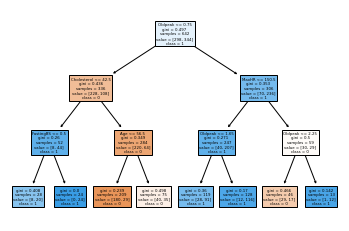

In [125]:
# Question 3.1: Experiment with the X features included (currently only Age is included). Add MaxHR, RestingBP, or any other numerical features. (Note you cannot yet include categorical features such as ChestPainType). Include the train and test accuracy on various different sets of variables. Include a printout of the tree.
classifier = tree.DecisionTreeClassifier(max_depth=3)# Visualize the tree
classifier = classifier.fit(X_train, y_train)

# Predict and measure the accuracy on the training set.
predicted_y_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, predicted_y_train)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of train examples")

# Predict and measure the accuracy on the testing set.
predicted_y_test = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y_test)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of test examples")

viz = tree.plot_tree(classifier, feature_names=X.columns, class_names=list(['0', '1']) , filled=True)
# Alternatively, visualize the tree using dtreeviz package
#from dtreeviz.trees import dtreeviz
#viz = treeviz(clf, X, y, target_name="y", feature_names=X.columns, class_names=list(['0', '1']))
viz